In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [6]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1, random_state=0)

# model = RandomForestClassifier(n_estimators=120, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1, random_state=0)

#### Model Accuracy Evaluation 

1. accuracy_score
2. Confusion Matrix

성능지표에서 잘 활용되고 있는 오차행렬은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(Confusion) 있는지를 잘 보여주는 지표가 된다.



In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
pred = model.predict(X_test)
score = accuracy_score(pred, y_test)

print(score)

0.9736842105263158


In [9]:
#Sample Data
y_true = [2,0,2,2,0,1] #실제 target
y_pred = [0,0,2,2,0,2] #예측한 값
confusion_matrix(y_true, y_pred)

# 1의 의미 실제값은 2인데 예측값은 0으로 한것이 1개 있다.

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [12]:
y_true1 = [2,1,0,0,1,2]
y_pred1 = [2,1,0,2,1,2]
confusion_matrix(y_true1, y_pred1)

array([[1, 0, 1],
       [0, 2, 0],
       [0, 0, 2]], dtype=int64)

In [15]:
a = ['cherry', 'apple', 'apple', 'banana', 'cherry'] #target
b = ['cherry', 'cherry', 'apple', 'banana', 'apple'] #예측값
confusion_matrix(a, b)

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]], dtype=int64)

In [16]:
a = ['cherry', 'apple', 'apple', 'banana', 'cherry'] #target
b = ['cherry', 'cherry', 'apple', 'banana', 'apple'] #예측값
confusion_matrix(a, b, labels=['cherry', 'apple', 'banana']) #lables 옵션은 인덱스를 수동으로 지정하는 옵션이다.

array([[1, 1, 0],
       [1, 1, 0],
       [0, 0, 1]], dtype=int64)

### Confustion Matric를 실제 데이타에 적용 and 시각화

In [26]:
cm = pd.DataFrame(confusion_matrix(y_test, pred),columns=iris.target_names, index=iris.target_names)
cm

,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,10,1
virginica,0,0,12


<AxesSubplot:>

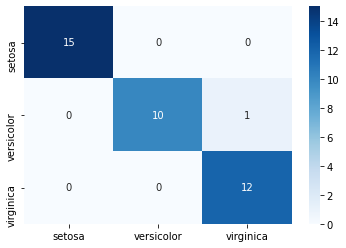

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)